# How well do the results of the algorithm compare with the internal data?

## Approach:
## -Treat the 2 datasets as training data and testing data
### =>Train classifiers
### =>Apply neural network

## Libraries

In [66]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#import pandas_profiling

In [2]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.3.0


## Data Prepocessing

In [4]:
path1 = '/Users/Any/Desktop/Hapag Lloyd/2020-11-02 CSA Working Student Test/internal_data.csv'
df1 = pd.read_csv(path1)

In [5]:
df1.head()

,Ship_Identifier;Port_Location_Code;Arrival_Datetime;Departure_Datetime
0,1177388;ISREY;21.09.2020 09:56;22.09.2020 01:23
1,1042825;FRLEH;29.08.2020 11:54;29.08.2020 21:18
2,1047446;DEBRV;11.08.2020 02:41;11.08.2020 11:05
3,1829059;ESALG;17.10.2020 14:26;17.10.2020 20:32
4,1245147;CAHAL;02.08.2020 02:11;02.08.2020 15:01


In [6]:
%%time
# Assume we only know that the csv file is somehow large, but not the exact size
# we want to know the exact number of rows

# Method 1, using file.readlines. Takes about 20 seconds.
with open(path1) as file:
    n_rows = len(file.readlines())

print (f'Exact number of rows: {n_rows}')

Exact number of rows: 3664
CPU times: user 2.58 ms, sys: 1.99 ms, total: 4.57 ms
Wall time: 3.14 ms


In [7]:
file = open('/Users/Any/Desktop/Hapag Lloyd/2020-11-02 CSA Working Student Test/internal_data.csv')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(';')
        last = line[3].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2],last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

In [8]:
processedList

[['Ship_Identifier',
  'Port_Location_Code',
  'Arrival_Datetime',
  'Departure_Datetime'],
 ['1177388', 'ISREY', '21.09.2020 09:56', '22.09.2020 01:23'],
 ['1042825', 'FRLEH', '29.08.2020 11:54', '29.08.2020 21:18'],
 ['1047446', 'DEBRV', '11.08.2020 02:41', '11.08.2020 11:05'],
 ['1829059', 'ESALG', '17.10.2020 14:26', '17.10.2020 20:32'],
 ['1245147', 'CAHAL', '02.08.2020 02:11', '02.08.2020 15:01'],
 ['1312911', 'USNYC', '02.09.2020 00:37', '02.09.2020 08:28'],
 ['1235621', 'USCHS', '28.10.2020 04:59', '29.10.2020 02:42'],
 ['1084669', 'ESVLC', '31.10.2020 23:00', '01.11.2020 12:55'],
 ['1060904', 'ESVLC', '25.10.2020 06:12', '25.10.2020 12:25'],
 ['1421230', 'GBLGP', '17.10.2020 13:15', '17.10.2020 17:16'],
 ['1722555', 'USORF', '31.07.2020 10:45', '31.07.2020 15:49'],
 ['1224869', 'ESVLC', '08.09.2020 01:34', '08.09.2020 07:30'],
 ['1850428', 'ESVLC', '09.08.2020 12:17', '09.08.2020 20:45'],
 ['1023712', 'ITGOA', '21.08.2020 19:44', '22.08.2020 19:22'],
 ['1871840', 'USMIA', '04.

In [9]:
columns = ['Ship_Identifier', 'Port_Location_Code', 'Arrival_Datetime', 'Departure_Datetime']
df_internal = pd.DataFrame(data = processedList, columns = columns)
df_internal.head()

,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime
0,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime
1,1177388,ISREY,21.09.2020 09:56,22.09.2020 01:23
2,1042825,FRLEH,29.08.2020 11:54,29.08.2020 21:18
3,1047446,DEBRV,11.08.2020 02:41,11.08.2020 11:05
4,1829059,ESALG,17.10.2020 14:26,17.10.2020 20:32


In [10]:
df_internal = df_internal.iloc[1:]
df_internal.head()

,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime
1,1177388,ISREY,21.09.2020 09:56,22.09.2020 01:23
2,1042825,FRLEH,29.08.2020 11:54,29.08.2020 21:18
3,1047446,DEBRV,11.08.2020 02:41,11.08.2020 11:05
4,1829059,ESALG,17.10.2020 14:26,17.10.2020 20:32
5,1245147,CAHAL,02.08.2020 02:11,02.08.2020 15:01


In [11]:
df_internal.shape

(3663, 4)

In [12]:
#df_internal.profile_report(title = "OSCAR Statistical Report")

In [13]:
path2 = '/Users/Any/Desktop/Hapag Lloyd/2020-11-02 CSA Working Student Test/results_algorithm.csv'
df2 = pd.read_csv(path2)

In [14]:
df2.head()

,Ship_Identifier;Port_Location_Code;Arrival_Datetime;Departure_Datetime
0,8457586;ISREY;2020-10-11 17:25:35;2020-10-15 0...
1,8726205;CASJF;2020-09-12 16:50:23;2020-09-18 0...
2,7979043;CAHAL;2020-07-31 18:42:38;2020-08-05 1...
3,2778725;CAHAL;2020-10-26 15:20:02;2020-11-01 1...
4,6315737;ESVGO;2020-09-05 15:38:21;2020-09-08 0...


In [15]:
%%time
# number of rows in the dataset

# Method 1, using file.readlines. Takes about 20 seconds.
with open(path2) as file:
    n_rows = len(file.readlines())

print (f'Exact number of rows: {n_rows}')

Exact number of rows: 32677
CPU times: user 11.7 ms, sys: 5.26 ms, total: 17 ms
Wall time: 15.6 ms


In [16]:
file = open('/Users/Any/Desktop/Hapag Lloyd/2020-11-02 CSA Working Student Test/results_algorithm.csv')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(';')
        last = line[3].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2],last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

In [17]:
processedList

[['Ship_Identifier',
  'Port_Location_Code',
  'Arrival_Datetime',
  'Departure_Datetime'],
 ['8457586', 'ISREY', '2020-10-11 17:25:35', '2020-10-15 05:02:48'],
 ['8726205', 'CASJF', '2020-09-12 16:50:23', '2020-09-18 04:47:09'],
 ['7979043', 'CAHAL', '2020-07-31 18:42:38', '2020-08-05 19:54:44'],
 ['2778725', 'CAHAL', '2020-10-26 15:20:02', '2020-11-01 10:13:13'],
 ['6315737', 'ESVGO', '2020-09-05 15:38:21', '2020-09-08 04:49:52'],
 ['6368902', 'ESVGO', '2020-10-07 20:55:22', '2020-10-09 10:01:05'],
 ['3426657', 'ISREY', '2020-10-24 03:23:35', '2020-10-26 13:00:00'],
 ['8260649', 'ESVGO', '2020-08-15 00:36:06', '2020-08-17 09:40:34'],
 ['7706322', 'GBLIV', '2020-07-26 00:10:52', '2020-07-26 05:55:43'],
 ['7984003', 'GBLIV', '2020-09-22 08:25:03', '2020-09-25 10:23:01'],
 ['6724346', 'GBLIV', '2020-08-16 04:05:59', '2020-08-18 09:49:02'],
 ['4035469', 'GBLIV', '2020-08-28 04:27:21', '2020-08-28 18:32:26'],
 ['2934380', 'USNYC', '2020-09-04 09:15:37', '2020-09-07 14:38:01'],
 ['5236885'

In [18]:
columns = ['Ship_Identifier', 'Port_Location_Code', 'Arrival_Datetime', 'Departure_Datetime']
df_algo = pd.DataFrame(data = processedList, columns = columns)
df_algo.head()

,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime
0,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime
1,8457586,ISREY,2020-10-11 17:25:35,2020-10-15 05:02:48
2,8726205,CASJF,2020-09-12 16:50:23,2020-09-18 04:47:09
3,7979043,CAHAL,2020-07-31 18:42:38,2020-08-05 19:54:44
4,2778725,CAHAL,2020-10-26 15:20:02,2020-11-01 10:13:13


In [19]:
df_algo = df_algo.iloc[1:]
df_algo.head()

,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime
1,8457586,ISREY,2020-10-11 17:25:35,2020-10-15 05:02:48
2,8726205,CASJF,2020-09-12 16:50:23,2020-09-18 04:47:09
3,7979043,CAHAL,2020-07-31 18:42:38,2020-08-05 19:54:44
4,2778725,CAHAL,2020-10-26 15:20:02,2020-11-01 10:13:13
5,6315737,ESVGO,2020-09-05 15:38:21,2020-09-08 04:49:52


In [20]:
df_algo.shape

(32676, 4)

In [21]:
# Number of missing values in each column of dataframe
missing_val_count_by_column = (df_internal.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [22]:
# Number of missing values in each column of dataframe
missing_val_count_by_column = (df_algo.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


### =>No missing values.

In [23]:
#df_algo.profile_report(title = "Statistical Report")

In [24]:
test = df_internal.copy()
train = df_algo.copy()

In [25]:
#add a column identifying whether a row is from train or test
#the new column will serve as the target

test['target'] = 0 # for internal data, test
train['target'] = 1 #1 for algorithm data, train

In [26]:
test.shape, train.shape

((3663, 5), (32676, 5))

In [27]:
test.head()

,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime,target
1,1177388,ISREY,21.09.2020 09:56,22.09.2020 01:23,0
2,1042825,FRLEH,29.08.2020 11:54,29.08.2020 21:18,0
3,1047446,DEBRV,11.08.2020 02:41,11.08.2020 11:05,0
4,1829059,ESALG,17.10.2020 14:26,17.10.2020 20:32,0
5,1245147,CAHAL,02.08.2020 02:11,02.08.2020 15:01,0


In [28]:
train.head()

,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime,target
1,8457586,ISREY,2020-10-11 17:25:35,2020-10-15 05:02:48,1
2,8726205,CASJF,2020-09-12 16:50:23,2020-09-18 04:47:09,1
3,7979043,CAHAL,2020-07-31 18:42:38,2020-08-05 19:54:44,1
4,2778725,CAHAL,2020-10-26 15:20:02,2020-11-01 10:13:13,1
5,6315737,ESVGO,2020-09-05 15:38:21,2020-09-08 04:49:52,1


In [29]:
#combining test and train data
combine_data = pd.concat([train, test], axis=0, ignore_index=True)

In [30]:
combine_data.shape

(36339, 5)

In [31]:
combine_data.head()

,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime,target
0,8457586,ISREY,2020-10-11 17:25:35,2020-10-15 05:02:48,1
1,8726205,CASJF,2020-09-12 16:50:23,2020-09-18 04:47:09,1
2,7979043,CAHAL,2020-07-31 18:42:38,2020-08-05 19:54:44,1
3,2778725,CAHAL,2020-10-26 15:20:02,2020-11-01 10:13:13,1
4,6315737,ESVGO,2020-09-05 15:38:21,2020-09-08 04:49:52,1


In [32]:
combine_data['target'].value_counts()

1    32676
0     3663
Name: target, dtype: int64

/opt/anaconda3/envs/AdvancedProject2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

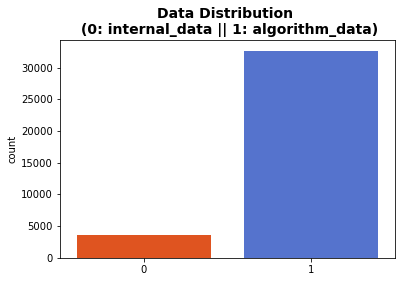

In [44]:
colors = ["orangered", "royalblue"]

sns.countplot('target', data=combine_data, palette=colors)
plt.title('Data Distribution \n (0: internal_data || 1: algorithm_data)', fontsize=14,fontweight='bold')
plt.xlabel('')
plt.ylabel('count')


## Balancing the dataset

#### target from internal data is denoted as 0, target from results algorithm is denoted as 1.

In [45]:
algorithm_data = combine_data[combine_data['target']==1]
internal_data = combine_data[combine_data['target']==0]

In [46]:
algorithm_data.shape, internal_data.shape

((32676, 5), (3663, 5))

In [47]:
algorithm_data = algorithm_data.sample(internal_data.shape[0])
algorithm_data.shape

(3663, 5)

In [48]:
algorithm_data.shape, internal_data.shape

((3663, 5), (3663, 5))

In [49]:
data = internal_data.append(algorithm_data, ignore_index=True)
data

,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime,target
0,1177388,ISREY,21.09.2020 09:56,22.09.2020 01:23,0
1,1042825,FRLEH,29.08.2020 11:54,29.08.2020 21:18,0
2,1047446,DEBRV,11.08.2020 02:41,11.08.2020 11:05,0
3,1829059,ESALG,17.10.2020 14:26,17.10.2020 20:32,0
4,1245147,CAHAL,02.08.2020 02:11,02.08.2020 15:01,0
...,...,...,...,...,...
7321,7556103,USFPO,2020-08-11 05:40:46,2020-08-16 12:10:47,1
7322,5762332,ITCTA,2020-08-09 16:50:00,2020-08-13 22:51:28,1
7323,8575797,HRPLE,2020-09-28 03:10:17,2020-10-02 00:40:30,1
7324,1708725,ITVDL,2020-08-09 13:10:01,2020-08-12 07:34:55,1


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ship_Identifier     7326 non-null   object
 1   Port_Location_Code  7326 non-null   object
 2   Arrival_Datetime    7326 non-null   object
 3   Departure_Datetime  7326 non-null   object
 4   target              7326 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 286.3+ KB


Distribution of target in the subsample dataset
1    0.5
0    0.5
Name: target, dtype: float64


/opt/anaconda3/envs/AdvancedProject2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


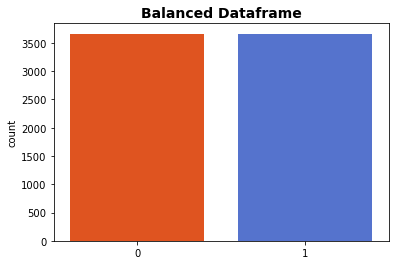

In [56]:
print('Distribution of target in the subsample dataset')
print(data['target'].value_counts()/len(data))



sns.countplot('target', data=data, palette=colors)
plt.title('Balanced Dataframe', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.show()

In [57]:
data['Ship_Identifier'] = data['Ship_Identifier'].astype(str).astype(int)

In [58]:
data['Arrival_Datetime'] = pd.to_datetime(data['Arrival_Datetime'],dayfirst=True)
data['Departure_Datetime'] = pd.to_datetime(data['Departure_Datetime'], dayfirst=True)

In [ ]:
#data['Arrival_Datetime'] = pd.to_datetime(data['Arrival_Datetime'], unit='ms')
#data['Departure_Datetime'] = pd.to_datetime(data['Departure_Datetime'], unit='ms')

In [59]:
# converting datetime into milliseconds
data['Departure_Datetime'] = data['Departure_Datetime'].astype(np.int64) // 10**9
data['Arrival_Datetime'] = data['Arrival_Datetime'].astype(np.int64) // 10**9

In [60]:
data.head()

,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime,target
0,1177388,ISREY,1600682160,1600737780,0
1,1042825,FRLEH,1598702040,1598735880,0
2,1047446,DEBRV,1597113660,1597143900,0
3,1829059,ESALG,1602944760,1602966720,0
4,1245147,CAHAL,1596334260,1596380460,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ship_Identifier     7326 non-null   int64 
 1   Port_Location_Code  7326 non-null   object
 2   Arrival_Datetime    7326 non-null   int64 
 3   Departure_Datetime  7326 non-null   int64 
 4   target              7326 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 286.3+ KB


### Labelling Port Location codes

In [62]:
port_code_label = LabelEncoder()
data['port_code_label'] = port_code_label.fit_transform(data['Port_Location_Code'])
data.head()

,Ship_Identifier,Port_Location_Code,Arrival_Datetime,Departure_Datetime,target,port_code_label
0,1177388,ISREY,1600682160,1600737780,0,65
1,1042825,FRLEH,1598702040,1598735880,0,44
2,1047446,DEBRV,1597113660,1597143900,0,11
3,1829059,ESALG,1602944760,1602966720,0,26
4,1245147,CAHAL,1596334260,1596380460,0,5


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7326 entries, 0 to 7325
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Ship_Identifier     7326 non-null   int64 
 1   Port_Location_Code  7326 non-null   object
 2   Arrival_Datetime    7326 non-null   int64 
 3   Departure_Datetime  7326 non-null   int64 
 4   target              7326 non-null   int64 
 5   port_code_label     7326 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 343.5+ KB


In [64]:
data.columns

Index(['Ship_Identifier', 'Port_Location_Code', 'Arrival_Datetime',
       'Departure_Datetime', 'target', 'port_code_label'],
      dtype='object')

In [67]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['Ship'] = rob_scaler.fit_transform(data['Ship_Identifier'].values.reshape(-1,1))
data['Port'] = rob_scaler.fit_transform(data['port_code_label'].values.reshape(-1,1))
data['Arrival'] = rob_scaler.fit_transform(data['Arrival_Datetime'].values.reshape(-1,1))
data['Departure'] = rob_scaler.fit_transform(data['Departure_Datetime'].values.reshape(-1,1))

data.drop(['Ship_Identifier','port_code_label', 'Arrival_Datetime', 'Departure_Datetime', 'Port_Location_Code'], axis=1, inplace=True)

In [68]:
data.head()

,target,Ship,Port,Arrival,Departure
0,0,-0.178447,-0.333333,0.148806,0.104116
1,0,-0.211744,-0.559140,-0.309000,-0.360811
2,0,-0.210601,-0.913978,-0.676234,-0.730537
3,0,-0.017191,-0.752688,0.671921,0.621772
4,0,-0.161680,-0.978495,-0.856433,-0.907841


Text(0.5, 1.0, 'Correlation Matrix ')

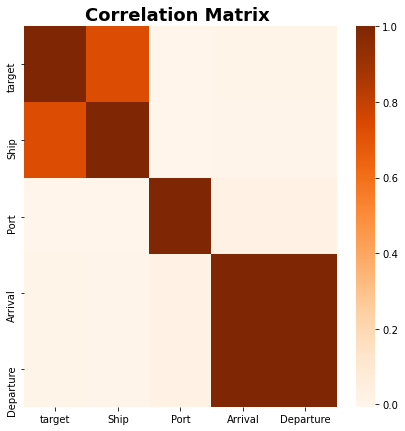

In [83]:
f, ax1 = plt.subplots(1, 1, figsize=(7,7))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='Oranges', annot_kws={'size':10}, ax=ax1)
ax1.set_title("Correlation Matrix ", fontsize=18, fontweight='bold')

In [78]:
corr
corr.style.background_gradient(cmap='Oranges').set_precision(4)

,target,Ship,Port,Arrival,Departure
target,1.0000,0.7326,-0.0062,0.0079,0.0063
Ship,0.7326,1.0000,-0.0017,0.0051,0.0039
Port,-0.0062,-0.0017,1.0000,0.0232,0.0241
Arrival,0.0079,0.0051,0.0232,1.0000,0.9979
Departure,0.0063,0.0039,0.0241,0.9979,1.0000


### Observations:
#### -Strong correlation between Arrival time and Departure time
#### -"Ship id "and the fact that the data is from results algorithm or internal data are correlated somehow

### Split the data into training and testing set

In [84]:
X = data[['Ship','Port', 'Arrival', 'Departure']]
y = data['target']

In [ ]:
#X.info()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [86]:
X_train.shape, y_train.shape

((5860, 4), (5860,))

In [69]:
#scaler = StandardScaler()
#X_test = scaler.transform(X_test)

In [ ]:
#X_train = X_train.values
#X_test = X_test.values
#y_train = y_train.values
#y_test = y_test.values

## Train 3 types of classifier to observe which one is more effective.

In [87]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [88]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 93.0 % accuracy score


In [96]:
def run_LogisticRegression(X_train, X_test, y_train, y_test):
    clf1 = LogisticRegression(random_state=0, n_jobs=10)
    clf1.fit(X_train, y_train)
    y_pred1 = clf1.predict(X_test)
    print('LogisticRegression Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred1))

In [97]:
def run_KNeighbors(X_train, X_test, y_train, y_test):
    clf2 = KNeighborsClassifier(n_jobs=10)
    clf2.fit(X_train, y_train)
    y_pred2 = clf2.predict(X_test)
    print('KNeighbors Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred2))

In [98]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf3 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf3.fit(X_train, y_train)
    y_pred3 = clf3.predict(X_test)
    print('RandomForest Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred3))

In [99]:
%%time
run_LogisticRegression(X_train, X_test, y_train, y_test)
run_KNeighbors(X_train, X_test, y_train, y_test)
run_randomForest(X_train, X_test, y_train, y_test)

LogisticRegression Accuracy on test set: 
0.9283765347885402
KNeighbors Accuracy on test set: 
0.9201909959072305
RandomForest Accuracy on test set: 
0.9290586630286494
CPU times: user 1.45 s, sys: 83.9 ms, total: 1.53 s
Wall time: 1.77 s


In [100]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

classifier1 = LogisticRegression(random_state=0, n_jobs=10)
log_reg_pred = cross_val_predict(classifier1,X_train, y_train, cv=5,
                             method="decision_function")

classifier2 = KNeighborsClassifier(n_jobs=10)
knears_pred = cross_val_predict(classifier2, X_train, y_train, cv=5)

classifier3 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
random_forest_pred = cross_val_predict(classifier3, X_train, y_train, cv=5)

In [102]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Random Forest: ', roc_auc_score(y_train, random_forest_pred))

Logistic Regression:  0.9446953371617608
KNears Neighbors:  0.9225255972696245
Random Forest:  0.9324232081911262


### Comparing the classifiers results to CNN model results

## CNN model

In [ ]:
data.shape

In [103]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
#X = np.asarray(X).astype('float32')

In [105]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [106]:
X_train.shape, y_train.shape

((5860, 4, 1), (5860,))

In [117]:
epochs = 30
model = Sequential()
model.add(Conv1D(32,2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv1D(64,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 3, 32)             96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 3, 32)             128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 32)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2, 64)             4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 2, 64)             256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 2, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [119]:
model.compile(optimizer= Adam(lr=0.0001), loss='binary_crossentropy', metrics='accuracy')

In [120]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
184/184 [==============================] - 1s 4ms/step - loss: 0.8169 - accuracy: 0.6114 - val_loss: 0.7544 - val_accuracy: 0.5014
Epoch 2/30
184/184 [==============================] - 0s 3ms/step - loss: 0.5896 - accuracy: 0.7305 - val_loss: 0.5069 - val_accuracy: 0.7497
Epoch 3/30
184/184 [==============================] - 1s 3ms/step - loss: 0.5022 - accuracy: 0.7722 - val_loss: 0.3493 - val_accuracy: 0.8492
Epoch 4/30
184/184 [==============================] - 1s 3ms/step - loss: 0.4365 - accuracy: 0.8102 - val_loss: 0.3107 - val_accuracy: 0.8711
Epoch 5/30
184/184 [==============================] - 1s 3ms/step - loss: 0.4002 - accuracy: 0.8314 - val_loss: 0.2946 - val_accuracy: 0.8820
Epoch 6/30
184/184 [==============================] - 1s 3ms/step - loss: 0.3897 - accuracy: 0.8406 - val_loss: 0.2815 - val_accuracy: 0.8909
Epoch 7/30
184/184 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.8488 - val_loss: 0.2734 - val_accuracy: 0.8929
Epoch 

#### Training accuracy and validation accuracy are close; sign of a good fit.

In [122]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

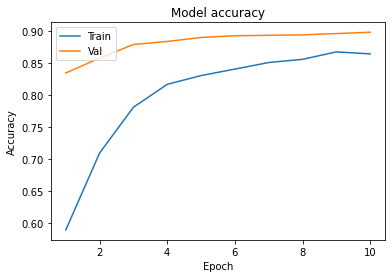

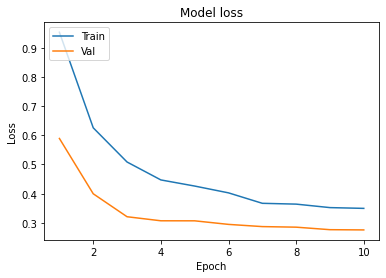

In [61]:
plot_learningCurve(history, epochs)

#### Training loss and validation loss decrease continuously.

#### =>But previous classifiers perform better than CNN model.